In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

# Assignment 5

## 1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 

#### Training Error (MSE, MAE)
#### Testing Error (MSE, MAE)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
# Training dataset
df = pd.read_csv('../data/WineQT.csv')

Dataset: https://www.kaggle.com/rajyellow46/wine-quality

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
y = df["quality"]
x = df.drop(["quality"], axis = 1)

In [6]:
y.shape, y.size

((1142,), 1142)

In [7]:
x.shape, x.size

((1142, 11), 12562)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [9]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg.coef_, linreg.intercept_

(array([ 3.73731261e-02, -8.27295822e-01, -1.14744117e-01,  1.70232093e-02,
        -2.02425202e+00,  7.27119711e-04, -2.80587246e-03, -2.37449383e+01,
        -1.91956226e-01,  9.48032814e-01,  2.73168379e-01]),
 26.91899784410421)

In [10]:
pred = linreg.predict(x_train)

In [11]:
sugar = x_train["residual sugar"]

In [12]:
sugar.shape, pred.shape

((571,), (571,))

Text(0, 0.5, 'Wine Quality')

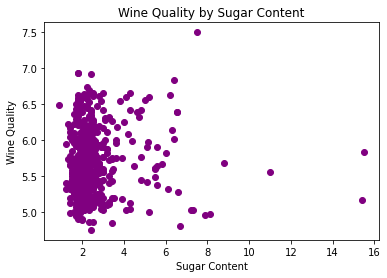

In [13]:
plt.scatter(sugar, pred, c = "purple")
plt.title("Wine Quality by Sugar Content")
plt.xlabel("Sugar Content")
plt.ylabel("Wine Quality")

In [14]:
# Train MSE and MAE
print(mean_squared_error(y_train, pred))
print(mean_absolute_error(y_train, pred))

0.4260571458135494
0.5103115138055352


In [15]:
# Test MSE and MAE
print(mean_squared_error(y_test, np.dot(x_test, linreg.coef_) + linreg.intercept_))
print(mean_absolute_error(y_test, np.dot(x_test, linreg.coef_) + linreg.intercept_))

0.3947245336824352
0.4845559304017829


## 2. Choose a classification dataset (not the adult.data set, perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate: 
#### Accuracy
#### Confusion Matrix
#### Classifcation Report

In [ ]:
class = pd.read_csv('../data/WineQT.csv')

In [ ]:
class.columns

In [ ]:
y = class[""]
x = class([""], axis = 1)

### Import libraries, define model, test/train/split

In [729]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix
                            )

In [730]:
model = DecisionTreeClassifier(criterion = "entropy")

In [731]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.50)

In [732]:
x_test.shape, x_train.shape

((571, 11), (571, 11))

In [733]:
y_test.shape, y_train.shape

((571,), (571,))

### Train

In [734]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

##### Feature Importances

In [735]:
list(zip(x.columns, model.feature_importances_))

[('fixed acidity', 0.08147017493363087),
 ('volatile acidity', 0.15001754033356043),
 ('citric acid', 0.06951872605508914),
 ('residual sugar', 0.061313460722376485),
 ('chlorides', 0.06691291921237352),
 ('free sulfur dioxide', 0.08708687189794129),
 ('total sulfur dioxide', 0.08275321833101687),
 ('density', 0.0632502085969847),
 ('pH', 0.09345163942785982),
 ('sulphates', 0.09201002699099102),
 ('alcohol', 0.15221521349817582)]

In [736]:
predictions = model.predict(x_train)

In [737]:
accuracy_score(y_test, predictions)

0.3467600700525394

In [738]:
confusion_matrix(y_test, predictions)

array([[  0,   0,   1,   2,   1,   1],
       [  0,   0,   7,   7,   2,   0],
       [  1,   6,  99, 113,  31,   3],
       [  0,   7,  91,  90,  29,   4],
       [  0,   4,  28,  27,   9,   1],
       [  0,   0,   3,   2,   2,   0]], dtype=int64)

In [739]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        16
           5       0.43      0.39      0.41       253
           6       0.37      0.41      0.39       221
           7       0.12      0.13      0.13        69
           8       0.00      0.00      0.00         7

    accuracy                           0.35       571
   macro avg       0.15      0.15      0.15       571
weighted avg       0.35      0.35      0.35       571



### Test

In [740]:
test_predictions = model.predict(x_test)

In [741]:
predictions.shape, test_predictions.shape

((571,), (571,))

In [742]:
accuracy_score(y_test, test_predictions)

0.5148861646234676

In [743]:
confusion_matrix(y_test, test_predictions)

array([[  0,   0,   3,   2,   0,   0],
       [  0,   0,   9,   5,   2,   0],
       [  2,  12, 154,  73,  11,   1],
       [  3,   8,  59, 102,  47,   2],
       [  2,   0,   2,  23,  37,   5],
       [  0,   0,   1,   2,   3,   1]], dtype=int64)

In [744]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        16
           5       0.68      0.61      0.64       253
           6       0.49      0.46      0.48       221
           7       0.37      0.54      0.44        69
           8       0.11      0.14      0.12         7

    accuracy                           0.51       571
   macro avg       0.27      0.29      0.28       571
weighted avg       0.54      0.51      0.52       571

